In [1]:
import numpy as np
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from main_grape.Grape import Grape
from helper_functions.grape_functions import *
%pylab inline




Populating the interactive namespace from numpy and matplotlib


In [2]:

#Defining time scales

steps = 300
qubit_num = 3
total_time = 1.5*qubit_num
qubit_state_num = 2

       

#Defining Forbidden sates

#states_forbidden_list = []

#Defining Concerned states (starting states)
psi0 = concerned(qubit_num,qubit_state_num)

#Defining states to include in the drawing of occupation
states_draw_list = range(qubit_state_num**qubit_num)
states_draw_names =[]
for ii in states_draw_list:
    states_draw_names.append(Basis(ii,qubit_num,qubit_state_num))

#Defining U (Target)

U= transmon_gate(qft(qubit_num),qubit_state_num)
#U = np.diag(np.arange(0,4))

#Defining U0 (Initial)
qq_identity = np.identity(qubit_state_num**qubit_num)
U0= qq_identity

#Defining control Hs
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
Q_I = np.identity(qubit_state_num)

Q_xx = multi_kron(Q_x,qubit_num)
Q_yy = multi_kron(Q_y,qubit_num)
Q_zz = multi_kron(Q_z,qubit_num)

H0 = 0.5* (Q_xx+Q_yy+Q_zz)

Hops = []
Hnames = []
ops_max_amp = []
Hops,Hnames,ops_max_amp = append_separate_krons(Q_x,'x',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=1.1)
Hops,Hnames,ops_max_amp = append_separate_krons(Q_y,'y',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=1.1)
Hops,Hnames,ops_max_amp = append_separate_krons(Q_z,'z',qubit_num,qubit_state_num,Hops,Hnames,ops_max_amp,amp=1.1)
Hops.extend([Q_xx,Q_yy,Q_zz])
Hnames.extend(['all x','all y','all z'])
ops_max_amp.extend([1.1,1.1,1.1])

#Defining convergence parameters
max_iterations = 500
decay = max_iterations/2
convergence = {'rate':0.05, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-3,'learning_rate_decay':decay}
penalty_coeffs = {'envelope' : 0, 'dc':0, 'dwdt':0.01,'d2wdt2':0.001*0.01, 'forbidden':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

print states_draw_names
print Hnames
print np.shape(U)
print np.shape(Hops)





['000', '001', '010', '011', '100', '101', '110', '111']
['xii', 'ixi', 'iix', 'yii', 'iyi', 'iiy', 'zii', 'izi', 'iiz', 'all x', 'all y', 'all z']
(8, 8)
(12, 8, 8)


L-BFGS-B optimization done


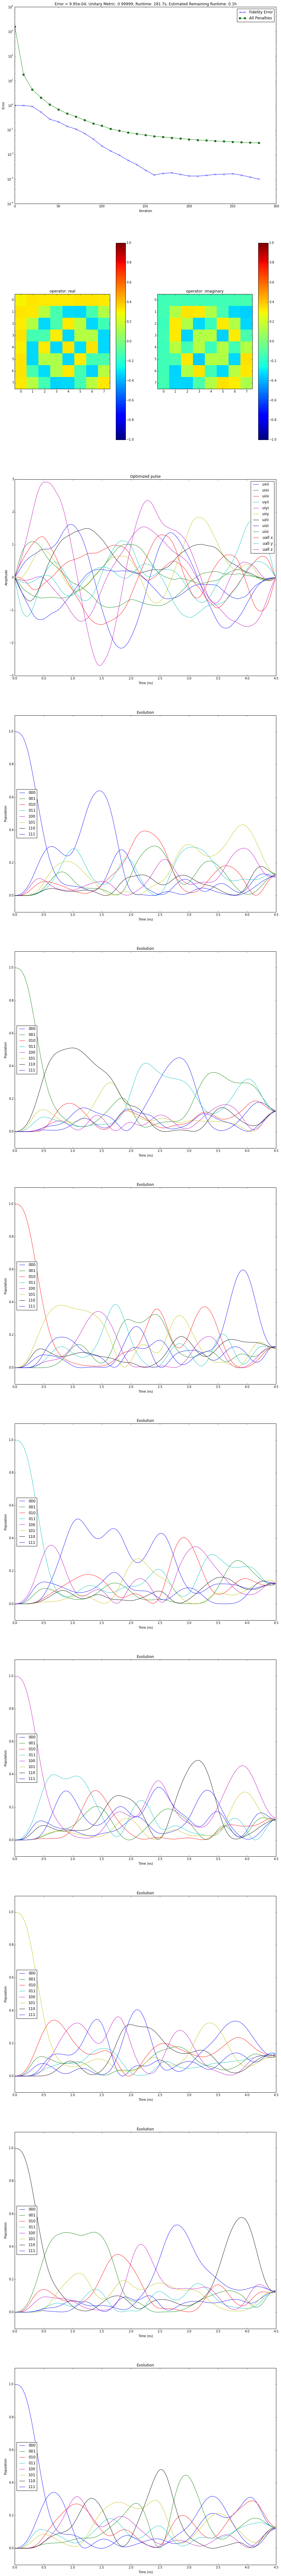

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
uks,Uf=Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence,penalty_coeffs = penalty_coeffs,
      draw = [states_draw_list,states_draw_names], show_plots = True, method = 'L-BFGS-B', unitary_error = 1e-4,switch=True)